In [1]:
__nbid__ = '0045'
__author__  = 'Vinicius Placco <vinicius.placco@noirlab.edu>, Brian Molina Merino <brian.merino@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__keywords__ = ['IRAF', 'Gemini', 'GMOS', 'data reduction']

# Reducción de datos de espectroscopía de ranura larga Gemini GMOS utilizando Pyraf
*Autores: Brian Molina Merino, Vinicius Placco*

*Adaptado de https://gitlab.com/nsf-noirlab/csdc/usngo/IRAF_tutorials*

#### (_Traducción de [DataReductionPyrafGMOS.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/DataReduction/PyrafGMOS/DataReductionPyrafGMOS.ipynb)_)

## Tabla de contenido
* [Objetivos](#goals)
* [Resumen](#summary)
* [Avisos Legales y Atribuciones](#disclaimer)
* [Importaciones y configuración](#imports)
* [Descarga de datos para la reducción](#download)
* [Comenzar la reducción básica](#Basic_Reduction)
* [Determinar la solución en longitud de onda](#Wavelength_Solution)
* [Extraer espectro](#Extract_Spectrum)
* [Mostrar el resultado](#Display_Output)
* [Limpieza (opcional)](#Clean-up)
* [Recursos](#Resources)

<a class="anchor" id="goals"></a>
# Objetivos
Mostrar cómo realizar la reducción de datos de espectroscopía de rendija larga (longslit) con GMOS utilizando el paquete Gemini Pyraf en la plataforma científica de Data Lab. Los pasos incluyen la descarga de datos desde el archivo Gemini, el procesamiento de flats y bias, y finalmente la creación de un único espectro 1D calibrado en longitud de onda. Para simplificar, en este ejemplo no se realiza calibración en flujo.

<a class="anchor" id="summary"></a>
# Resumen
En este notebook presentamos un ejemplo de un notebook de Gemini GMOS que funciona en el entorno de Data Lab para reducir completamente datos de espectroscopía GMOS longslit B600. Esta es una versión del tutorial de reducción GMOS longslit Hamamatsu presentado aquí:
https://gitlab.com/nsf-noirlab/csdc/usngo/IRAF_tutorials.
El libro de cocina (cookbook) general de reducción de datos GMOS de la US National Gemini Office está enlazado aquí:
https://noirlab.edu/science/programs/csdc/usngo/gmos-cookbook/. El objeto en este ejemplo es la estrella estándar <a href="http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD166379">HD166379</a>, observada como parte del programa de Gemini Norte <a href="https://archive.gemini.edu/searchform/GN-2018B-Q-403-54">GN-2018B-Q-54</a>. El tiempo de exposición fue de 5 segundos, con el flat-field y la lámpara de arco CuAr tomados inmediatamente después de la observación científica.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [1]:
# Solución alternativa para la importación de pyraf restableciendo el CWD en /home/
import os
cwd = os.getcwd()

from pyraf import iraf
from pyraf.iraf import gemini, gmos
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

os.chdir(cwd)

could not open XWindow display
could not open XWindow display

No graphics display available for this session.
Graphics tasks that attempt to plot to an interactive screen will fail.
For help, search "PyRAF FAQ 5.13"



<a class="anchor" id="download"></a>
# Descarga de datos del archivo Gemini

Cree una lista de los nombres de archivos de los datos de espectroscopía B600 de ranura larga GMOS sin procesar y use wget para descargarlos del archivo Gemini. El conjunto de datos incluye bias, campo de flat, lámpara de arco y una exposición de ciencia.

In [2]:
%%bash

# crear un archivo que enumere los archivos FITS que se descargarán
echo "
https://archive.gemini.edu/file/N20190302S0248.fits
https://archive.gemini.edu/file/N20190302S0249.fits
https://archive.gemini.edu/file/N20190302S0250.fits
https://archive.gemini.edu/file/N20190304S0204_bias.fits" > gmos.list

# descargue con wget los archivos FITS del archivo Gemini para procesarlos (en modo silencioso)
wget --no-check-certificate -N -q -i gmos.list

<a class="anchor" id="Basic_Reduction"></a>
# Reducción básica

Reducción básica (incluida la resta de bias) de las imágenes de ciencia, de arco y flats. El penúltimo paso genera el campo flat final y lo aplica a la imagen de ciencia. En los primeros tres comandos, los fotogramas sin formato se ejecutan a través de `gsreduce` para crear mosaicos (`fl_gmosaic="Yes"`) sin campo flat, recorte, enmascarado de píxeles malos ni solución de longitud de onda (`fl_flat="No"`, `fl_fixpix="No"`, `fl_gsappwave="No"`, `fl_cut="No"`). El cuarto comando crea el campo flat final y el último comando lo aplica a la imagen de ciencia.

*Nota: durante la reducción de datos en las siguientes tres celdas, se crearán y eliminarán varios archivos temporales (comenzando con `tmp`). Además, después de cada paso de reducción, se crea un archivo `fits` utilizando el nombre del archivo original con un prefijo de 1 letra (por ejemplo, `sN20190302S0250`). Se seguirán añadiendo letras individuales hasta que se genere el espectro extraído final. Esta celda tardará unos minutos en ejecutarse.*

In [3]:
gmos.gsreduce(inimages="N20190302S0248", 
              fl_flat="No", fl_gmosaic="Yes", fl_fixpix="No", fl_gsappwave="No", 
              fl_cut="No", bias="N20190304S0204_bias")

gmos.gsreduce(inimages="N20190302S0249", rawpath="./", 
              fl_flat="No", fl_gmosaic="Yes", fl_fixpix="No", fl_gsappwave="No", 
              fl_cut="No", bias="N20190304S0204_bias")

gmos.gsreduce(inimages="N20190302S0250", rawpath="./", 
              fl_flat="No", fl_gmosaic="Yes", fl_fixpix="No", fl_gsappwave="No", 
              fl_cut="No", bias="N20190304S0204_bias")

gmos.gsflat(inflats="gsN20190302S0250", specflat="N20190302S0250_flat",
            order="23", fl_over="Yes")

gmos.gsreduce(inimages="gsN20190302S0248", flat="N20190302S0250_flat",
              fl_over="No", fl_bias="No", fl_trim="No")


----------------------------------------------------------------------------
GSREDUCE -- Sat Dec  6 06:08:38 UTC 2025

Input image or list  = N20190302S0248
Output image or list = 
Output prefix        = gs

Overscan subtraction  fl_over      = yes
Trim image            fl_trim      = yes
Bias subtraction      fl_bias      = yes
Cosmic ray cleaning   fl_gscrrej   = no
New CR cleaning       fl_crspec    = no
Dark subtraction      fl_dark      = no
QE Correction         fl_qecorr    = no
Flat field correction fl_flat      = no
Mosaic the CCDs       fl_gmosaic   = yes
Fixpix chip gaps      fl_fixpix    = no
Cut MOS spectra       fl_cut       = no
Add titles to MOS     fl_title     = yes
Oversize slit length  fl_oversize  = yes
Run gsappwave         fl_gsappwave = no
Run gsscatsub         fl_scatsub   = no
VAR & DQ planes       fl_vardq     = no

geointer = linear
gradimage= 
refimage = 
bias     = N20190304S0204_bias
dark     = 
qe_refim    = 
qe_corrim   = 
qe_corrpref = qecorr
flatim  

<a class="anchor" id="Wavelength_Solution"></a>
# Determinar la solución de longitud de onda

De forma no interactiva (`fl_inte="no"`), determine la solución de longitud de onda y aplíquela a la imagen de la lámpara de arco.

In [4]:
gmos.gswavelength(inimages="gsN20190302S0249", fl_inte="no")
gmos.gstransform(inimages="gsN20190302S0249", wavtraname="gsN20190302S0249")

--------------------------------------------------------------------------------
GSWAVELENGTH -- Sat Dec  6 06:10:36 UTC 2025
 
inimages = gsN20190302S0249
--------------------------------------------------------------------------------
GSAPPWAVE -- Sat Dec  6 06:10:36 UTC 2025
 
inimages = gsN20190302S0249.fits
Grating: B600+_G5307
Grating central wavelength: 420.0 [nm]
Resolution (0.5'' slit): 1530.15477728
Anamorphic factor: 1.14009149926
Grating tilt (header): 57.0085
Calculated tilt: 57.009
nm/pix = 0.101015300804
Filter1: open1-6
Filter2: open2-8
Approximate available wavelength coverage based on grating,
    filters and detector type is: 300.0 - 1080.0 [nm]

Calibrating: [SCI,1]
    Spectrum length in pixels: 3138
    Approximate location of grating central 
        wavelength in pixels: 1569.0
    Approximate wavelength coverage based on
        spectrum length and calculated dispersion is:  300 - 1080 [nm]
 
GSAPPWAVE done
------------------------------------------------------

<a class="anchor" id="Extract_Spectrum"></a>
# Extraer espectro

Aplique la solución de longitud de onda a la imagen de ciencia, realice una resta del cielo y extraiga el espectro estelar en modo no interactivo (`fl_inte="no"`).

In [5]:
gmos.gstransform(inimages="gsgsN20190302S0248", wavtran="gsN20190302S0249")
gmos.gsskysub(input="tgsgsN20190302S0248")
gmos.gsextract(inimages="stgsgsN20190302S0248", fl_inte="no")

-------------------------------------------------------------------------------
GSTRANSFORM -- Sat Dec  6 06:10:44 UTC 2025
 

inimages   = gsgsN20190302S0248
outimages  = 
outprefix  = t
fl_stran   = no
fl_wavtran = yes
wavtraname = gsN20190302S0249
database   = database
fl_vardq   = no
interptype = linear
lambda1    = INDEF
lambda2    = INDEF
dx         = INDEF
nx         = INDEF
lambdalog  = no
ylog       = no
fl_flux    = yes
gratingdb  = gmos$data/GMOSgratings.dat
filterdb   = gmos$data/GMOSfilters.dat
key_dispaxis = DISPAXIS
dispaxis   = 1
sci_ext    = SCI

Transforming gsgsN20190302S0248.fits[SCI,1]
MDF row: 1

NOIRLab IRAF V2.18 @gp13.datalab.noirlab.edu Fri 23:10:44 05-Dec-2025
  Transform gsgsN20190302S0248.fits[SCI,1] to tmpsci1421732_198.
  Conserve flux per pixel.
  User coordinate transformations:
    gsN20190302S0249_001
  Interpolation is linear.
  Using edge extension for out of bounds pixel values.
  Output coordinate parameters are:
    x1 =      2652., x2 =      580

<a class="anchor" id="Display_Output"></a>
# Mostrar el espectro completamente reducido

Lea el espectro reducido con astropy, creando matrices para el flujo y la longitud de onda. La matriz `wave` se genera obteniendo el número de píxeles en la matriz `flux` y utilizando los valores de longitud de onda para el primer píxel (`CRVAL1`) y el paso de longitud de onda (`CD1_1`).

In [6]:
iraf_out = fits.open("estgsgsN20190302S0248.fits")

flux = iraf_out[2].data
wave = np.arange(flux.shape[0]) * iraf_out[2].header['CD1_1'] + iraf_out[2].header['CRVAL1']

Muestre el espectro utilizando rutinas estándar matplotlib.pyplot.

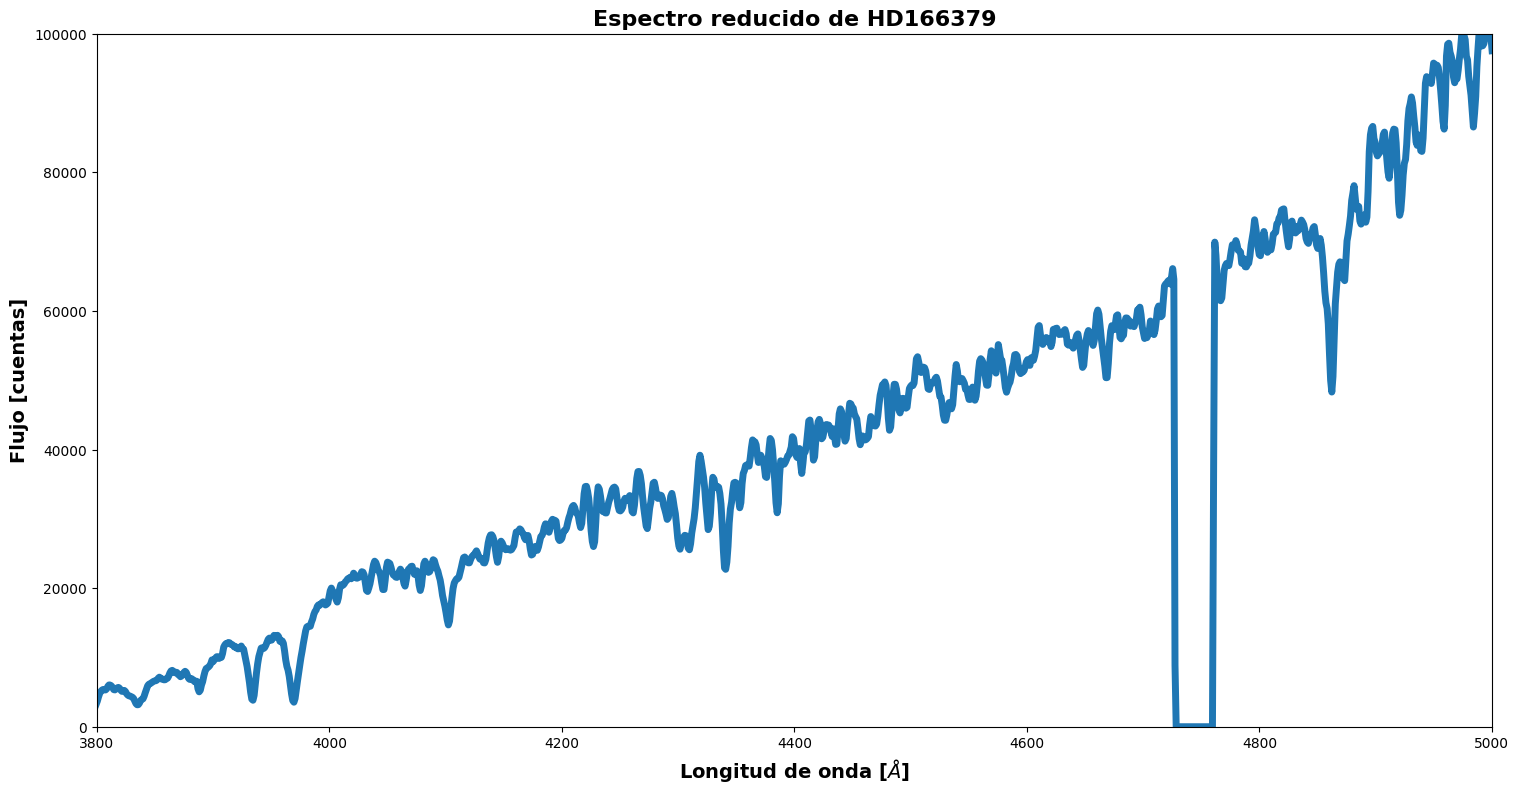

In [9]:
plt.figure(figsize = (18,9))
plt.xlim(3800,5000)
plt.ylim(0,100000)
plt.plot(wave,flux, linewidth=5)
plt.xlabel('Longitud de onda [$\AA$]',fontsize=14,fontweight='bold')
plt.ylabel('Flujo [cuentas]',fontsize=14,fontweight='bold')
plt.title('Espectro reducido de HD166379',fontsize=16,fontweight='bold')
plt.show()

<a class="anchor" id="Clean-up"></a>
# Limpieza (opcional)

Borre todos los archivos fits, listas, registros y bases de datos de ajustes creados durante la reducción. Para eso, descomente la línea a continuación y ejecútela. (Esto es necesario, por ejemplo, si desea volver a ejecutar el notebook, ya que algunos de los archivos producidos no se pueden sobrescribir con Gemini IRAF).

In [12]:
%%bash

#rm -f *N2019030*.fits Afx*.fits gmos.list gmos.log _sed tmp* # eliminar archivos
#rm -rf database/ # eliminar directorios

<a class="anchor" id="Resources"></a>
# Recursos

Libro de cocina de la US NGO para la reducción de GMOS: https://noirlab.edu/science/programs/csdc/usngo/gmos-cookbook/

Tutorial de reducción de Hamamatsu de ranura larga de GMOS: https://gitlab.com/nsf-noirlab/csdc/usngo/IRAF_tutorials